# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w~puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}
\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}
\begin{equation}
A_xy = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

In [194]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np

# import ainvert
# nie mogłem znaleźć pliku

A_inv = np.array([
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[-3, 3, 0, 0, -2, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[2, -2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, -3, 3, 0, 0, -2, -1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 2, -2, 0, 0, 1, 1, 0, 0],
[-3, 0, 3, 0, 0, 0, 0, 0, -2, 0, -1, 0, 0, 0, 0, 0],
[0, 0, 0, 0, -3, 0, 3, 0, 0, 0, 0, 0, -2, 0, -1, 0],
[9, -9, -9, 9, 6, 3, -6, -3, 6, -6, 3, -3, 4, 2, 2, 1],
[-6, 6, 6, -6, -3, -3, 3, 3, -4, 4, -2, 2, -2, -2, -1, -1],
[2, 0, -2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 2, 0, -2, 0, 0, 0, 0, 0, 1, 0, 1, 0],
[-6, 6, 6, -6, -4, -2, 4, 2, -3, 3, -3, 3, -2, -1, -2, -1],
[4, -4, -4, 4, 2, 2, -2, -2, 2, -2, 2, -2, 1, 1, 1, 1],
])


def interpolation_cubic(image, scale_x, scale_y):
    X, Y = image.shape

    new_X, new_Y = int(np.floor(scale_x * X)), int(np.floor(scale_y * Y))
    new_image = np.zeros((new_X, new_Y))

    for x in range(1, new_X):
        for y in range(1, new_Y):
            i = x / scale_x
            j = y / scale_y

            i1 = int(np.floor(i))
            i2 = int(np.floor(i) + 1)
            j1 = int(np.floor(j))
            j2 = int(np.floor(j) + 1)

            if i1 + 1 >= X:
                i1 = X - 2

            if i2  + 1 >= X:
                i2 = X - 2

            if j1 + 1 >= Y:
                j1 = Y - 2

            if j2 + 1 >= Y:
                j2 = Y - 2

            if i2 >= X:
                i2 = i2 - 1

            if j2 >= Y:
                j2 = j2 - 1

            if i2 == i1:
                i1 = i1 - 1

            if j2 == j1:
                j1 = j1 - 1

            A = image[i1, j1]
            B = image[i2, j1]
            C = image[i2, j2]
            D = image[i1, j2]

            Ax = (image[i1 + 1, j1] - image[i1 - 1, j1]) / 2
            Ay = (image[i1, j1 + 1] - image[i1, j1 - 1]) / 2
            Axy = (image[i1 + 1, j1 + 1] - image[i1 - 1, j1] - image[i1, j1 - 1] + image[i1, j1])

            Bx = (image[i2 + 1, j1] - image[i2 - 1, j1]) / 2
            By = (image[i2, j1 + 1] - image[i2, j1 - 1]) / 2
            Bxy = (image[i2 + 1, j1 + 1] - image[i2 - 1, j1] - image[i2, j1 - 1] + image[i2, j1])

            Cx = (image[i2 + 1, j2] - image[i2 - 1, j2]) / 2
            Cy = (image[i2, j2 + 1] - image[i2, j2 - 1]) / 2
            Cxy = (image[i2 + 1, j2 + 1] - image[i2 - 1, j2] - image[i2, j2 - 1] + image[i2, j2])

            Dx = (image[i1 + 1, j2] - image[i1 - 1, j2]) / 2
            Dy = (image[i1, j2 + 1] - image[i1, j2 - 1]) / 2
            Dxy = (image[i1 + 1, j2 + 1] - image[i2 - 1, j2] - image[i1, j2 - 1] + image[i1, j2])

            x_ = [A, B, D, C, Ax, Bx, Dx, Cx, Ay, By, Dy, Cy, Axy, Bxy, Dxy, Cxy]

            x_ = np.reshape(x_, (len(x_), 1))

            a = np.dot(A_inv, x_)

            a = np.reshape(a, (4, 4))

            for z in range(4):
                for t in range(4):
                    new_image[x, y] += a[z, t] * (x ** (-z)) * (y ** (-t))

    return new_image

In [195]:
def interpolation_linear(image, scale_x, scale_y):
    X, Y = image.shape

    new_X, new_Y = int(np.floor(scale_x * X)), int(np.floor(scale_y * Y))
    new_image = np.zeros((new_X, new_Y))

    for x in range(new_X):
        for y in range(new_Y):
            i = int(x/scale_x)
            j = int(y/scale_y)

            i1 = i
            i2 = i + 1
            j1 = j
            j2 = j + 1

            # zabezpieczenie
            if i2 >= X:
                i2 -= i2

            if j2 >= Y:
                j2 -= j2

            if i1 == i2:
                i1 -= i1

            if j1 == j2:
                j1 -= j1

            A = image[i1,j1]
            B = image[i2,j1]
            C = image[i2,j2]
            D = image[i1,j2]


            ABCD = (1/((i2-i1)*(j2-j1)))*\
                   (A*(i2-i)*(j2-j) + B*(i-i1)*(j2-j) +
                                           C*(i-i1)*(j-j1) + D*(i2-i)*(j-j1))

            new_image[x,y] = int(np.floor(ABCD))

    return new_image

C:\Users\Daniel\AppData\Local\Temp/ipykernel_488/3673868942.py:74: RuntimeWarning: overflow encountered in ubyte_scalars
  Ax = (image[i1 + 1, j1] - image[i1 - 1, j1]) / 2
C:\Users\Daniel\AppData\Local\Temp/ipykernel_488/3673868942.py:76: RuntimeWarning: overflow encountered in ubyte_scalars
  Axy = (image[i1 + 1, j1 + 1] - image[i1 - 1, j1] - image[i1, j1 - 1] + image[i1, j1])
C:\Users\Daniel\AppData\Local\Temp/ipykernel_488/3673868942.py:78: RuntimeWarning: overflow encountered in ubyte_scalars
  Bx = (image[i2 + 1, j1] - image[i2 - 1, j1]) / 2
C:\Users\Daniel\AppData\Local\Temp/ipykernel_488/3673868942.py:80: RuntimeWarning: overflow encountered in ubyte_scalars
  Bxy = (image[i2 + 1, j1 + 1] - image[i2 - 1, j1] - image[i2, j1 - 1] + image[i2, j1])
C:\Users\Daniel\AppData\Local\Temp/ipykernel_488/3673868942.py:82: RuntimeWarning: overflow encountered in ubyte_scalars
  Cx = (image[i2 + 1, j2] - image[i2 - 1, j2]) / 2
C:\Users\Daniel\AppData\Local\Temp/ipykernel_488/3673868942.py:83:

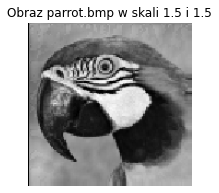

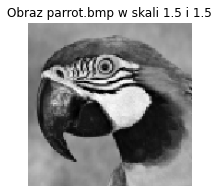

In [196]:
I_parrot = cv2.imread('parrot.bmp', cv2.IMREAD_GRAYSCALE)

I_parrot_1 = interpolation_cubic(I_parrot, 1.5, 1.5)
I_parrot_2 = interpolation_linear(I_parrot, 1.5, 1.5)

plt.figure(figsize=(I_parrot_1.shape[0]/50, I_parrot_2.shape[1]/50))
plt.imshow(I_parrot_1)
plt.axis('off')
plt.gray()
plt.title('Obraz parrot.bmp w skali 1.5 i 1.5')
plt.show()

plt.figure(figsize=(I_parrot_2.shape[0]/50, I_parrot_2.shape[1]/50))
plt.imshow(I_parrot_2)
plt.axis('off')
plt.gray()
plt.title('Obraz parrot.bmp w skali 1.5 i 1.5')
plt.show()

In [197]:
import timeit
%load_ext memory_profiler

mem_linear = %memit interpolation_linear(I_parrot, 1.5, 1.5)
mem_cubic = %memit interpolation_cubic(I_parrot, 3, 3)
time_linear = %timeit -n 1 -r 5 -o interpolation_linear(I_parrot, 1.5, 1.5)
time_cubic = %timeit -n 1 -r 5 -o interpolation_cubic(I_parrot, 1.5, 1.5)

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 116.31 MiB, increment: 0.17 MiB


C:\Users\Daniel\AppData\Local\Temp/ipykernel_488/3673868942.py:74: RuntimeWarning: overflow encountered in ubyte_scalars
  Ax = (image[i1 + 1, j1] - image[i1 - 1, j1]) / 2
C:\Users\Daniel\AppData\Local\Temp/ipykernel_488/3673868942.py:76: RuntimeWarning: overflow encountered in ubyte_scalars
  Axy = (image[i1 + 1, j1 + 1] - image[i1 - 1, j1] - image[i1, j1 - 1] + image[i1, j1])
C:\Users\Daniel\AppData\Local\Temp/ipykernel_488/3673868942.py:78: RuntimeWarning: overflow encountered in ubyte_scalars
  Bx = (image[i2 + 1, j1] - image[i2 - 1, j1]) / 2
C:\Users\Daniel\AppData\Local\Temp/ipykernel_488/3673868942.py:80: RuntimeWarning: overflow encountered in ubyte_scalars
  Bxy = (image[i2 + 1, j1 + 1] - image[i2 - 1, j1] - image[i2, j1 - 1] + image[i2, j1])
C:\Users\Daniel\AppData\Local\Temp/ipykernel_488/3673868942.py:82: RuntimeWarning: overflow encountered in ubyte_scalars
  Cx = (image[i2 + 1, j2] - image[i2 - 1, j2]) / 2
C:\Users\Daniel\AppData\Local\Temp/ipykernel_488/3673868942.py:83:

peak memory: 116.99 MiB, increment: 0.68 MiB
238 ms ± 5.12 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
1.22 s ± 5.31 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


Możemy zauważyć, że zasoby pamięciowe są zużyte w praktycznie tej samej ilości, lecz czas wykonywania metody
dwusześciennej, jest dłuższy, co przekłada się na większą ilości operacji arytmetycznych.


